In [1]:
#dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#file 
city_file= "data/city_data.csv"
ride_file = "data/ride_data.csv"
city_df = pd.read_csv('data/city_data.csv')
ride_df = pd.read_csv('data/ride_data.csv')

In [3]:
#merge files
df = pd.merge(city_df, ride_df, how="right", on="city")
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


<function matplotlib.pyplot.show(*args, **kw)>

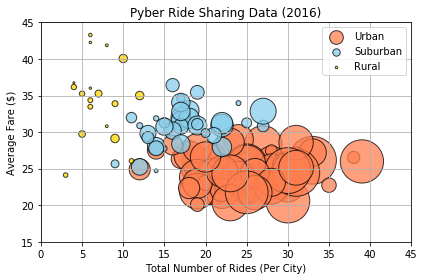

In [4]:
urban_df= df.loc[df['type'] == "Urban"]
urban_df = urban_df.groupby(["type", "city"]).agg({"fare": "mean", "ride_id": "count", "driver_count": "sum"})

suburban_df= df.loc[df['type'] == "Suburban"]
suburban_df =suburban_df.groupby(["type", "city"]).agg({"fare": "mean", "ride_id": "count", "driver_count": "sum"})

rural_df= df.loc[df['type'] == "Rural"]
rural_df =rural_df.groupby(["type", "city"]).agg({"fare": "mean", "ride_id": "count", "driver_count": "sum"})
#Urban Data
u_x_value= urban_df["ride_id"]
u_y_value= urban_df["fare"]
s = urban_df["driver_count"]
plt.scatter(u_x_value, u_y_value, marker="o", s= s, edgecolor="K",alpha=.75, facecolor=["coral"], label ="Urban")
#Suburban Data
s_x_value= suburban_df["ride_id"]
s_y_value= suburban_df["fare"]
s = suburban_df["driver_count"]
plt.scatter(s_x_value, s_y_value, marker="o", s= s, edgecolor="K",alpha=.75, facecolor=["skyblue"], label = "Suburban")
#Rural Data
r_x_value= rural_df["ride_id"]
r_y_value= rural_df["fare"]
s = rural_df["driver_count"]
plt.scatter(r_x_value, r_y_value, marker="o", s= s, edgecolor="K",alpha=.75, facecolor=["gold"], label = "Rural")


plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlim(0,45)
plt.ylim(15,45)
plt.legend(loc="best", markerscale=.4)
plt.grid()
plt.tight_layout()
plt.show


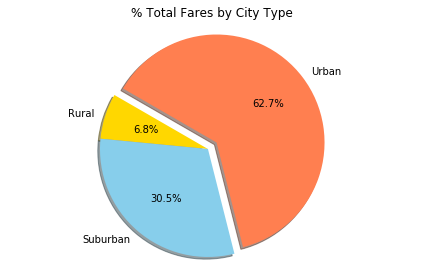

In [5]:
#total fares by city type
tf_df = df.groupby(["type"])["fare"].sum()
tf_df.plot(kind='pie', y= "", startangle=150,explode =(0,0,.1), colors = ("gold", "skyblue", "coral"), autopct="%1.1f%%", shadow=True, title = "% Total Fares by City Type")
plt.ylabel("")
plt.axis("equal")
plt.savefig
plt.tight_layout()
plt.show()

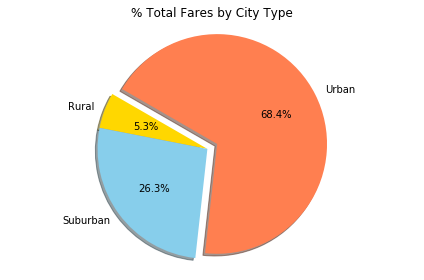

In [6]:
# % of Total Rides by City Type
tr_df = df.groupby(["type"])["ride_id"].count()
tr_df.plot(kind='pie', y= "", startangle=150,explode =(0,0,.1), colors = ("gold", "skyblue", "coral"), autopct="%1.1f%%", shadow=True, title = "% Total Fares by City Type")
plt.ylabel("")
plt.axis("equal")
plt.savefig
plt.tight_layout()
plt.show()


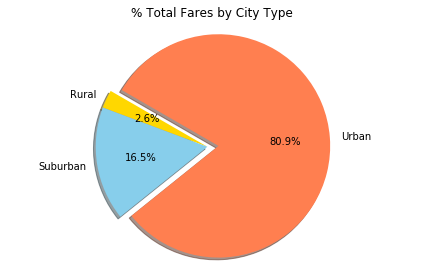

In [7]:
#% of Total Drivers by City Type
td_df = df.drop(columns = ["date", "fare", "ride_id"])
td_df = td_df.drop_duplicates("city")
td_df = td_df.groupby(["type"])["driver_count"].sum()
td_df.plot(kind='pie', y= "", startangle=150,explode =(0,0,.1), colors = ("gold", "skyblue", "coral"), autopct="%1.1f%%", shadow=True, title = "% Total Fares by City Type")
plt.ylabel("")
plt.axis("equal")
plt.savefig
plt.tight_layout()
plt.show()